# Extended SONIC model - application to US stimuli

## Rationale
Now that we've validated our custom connection scheme, let's apply it on the same model, but upon application of US stimuli.

### Objectives
- Observe the effects of axial conduction of on the response of stimulated and non-stimulated nodes
- Characterize the fundamental differences in behavior observed by using $Q_m$ or $V_{m, eff}$ as reference voltage variable for the contribution of axial currents ???
- Assess the influence of model specification and US stimulation parameters on system behavior

### Imports
Let's import the necessary packages and modules

In [4]:
%matplotlib inline

import logging
import numpy as np
import matplotlib.pyplot as plt

from PySONIC.utils import logger
from PySONIC.neurons import CorticalRS
from ext_sonic import SeriesConnector
from run_utils import runAStim

logger.setLevel(logging.DEBUG)

### Parameters
Let's set some default model and stimulation parameters.

Note that since we're trying to model the behavior of multiple "sonophore" nodes connected in series, **the default node length of the model is set to the in-plane diameter of a typical sonophore structure**.

In [5]:
# Model parameters
neuron = CorticalRS()
nnodes = 2
Ra = 1e2  # default order of magnitude found in litterature (Ohm.cm)
diam = 1e-6  # order of magnitude of axon node diameter (m)
L = 1e-5  # typical in-plane diameter of sonophore structure (m)
a = 32e-9  # sonophore diameter

# Stimulation parameters
Fdrive = 500e3  # Hz
Adrive = 50e3  # kPa
tstim = 150e-3  # s
toffset = 100e-3  # s
PRF = 100.  # Hz
DC = 1.

## Single-node model
Let's first check the behavior of a single node model

 22/08/2018 01:43:34: Creating model: NBLS_RS_1node (diam = 1 um, L = 10 um, Ra = 1e+02 ohm.cm) - classic connect scheme
 22/08/2018 01:43:34: Simulation completed in 23.56 ms
 22/08/2018 01:43:34: Creating model: NBLS_RS_1node (diam = 1 um, L = 10 um, Ra = 1e+02 ohm.cm) - classic connect scheme
 22/08/2018 01:43:34: Simulation completed in 97.79 ms
 22/08/2018 01:43:34: Creating model: NBLS_RS_1node (diam = 1 um, L = 10 um, Ra = 1e+02 ohm.cm) - classic connect scheme
 22/08/2018 01:43:34: Simulation completed in 107.82 ms


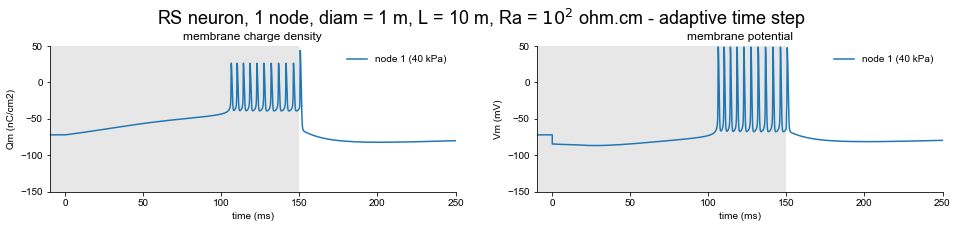

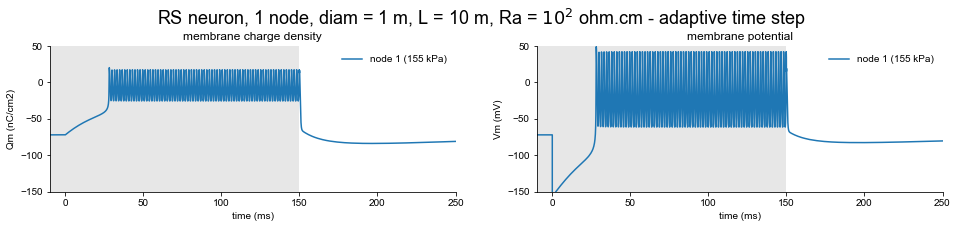

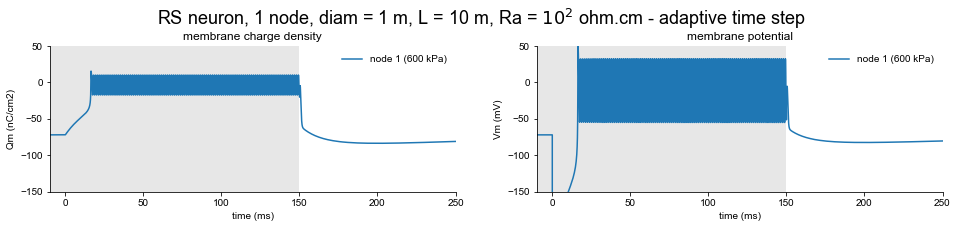

In [6]:
for Adrive_range in np.logspace(np.log10(40e3), np.log10(600e3), 3):
    fig = runAStim(neuron, 1, diam, L, Ra, None, a, Fdrive, Adrive_range, tstim, toffset, PRF, DC)

This single-node model behaves as expected: the US stimulus generates an instantaneous drop in effective membrane capacitance that hyperpolarizes $V_{m, eff}$ to a value far below its resting potential and then triggers a leakage-driven, progressive increase in membrane charge density up until a spiking threshold is reached, at which point the neuron starts its characteristic, US-amplitude-dependent spiking pattern.

## Extended model

Let's connect multiple nodes together with a ***SeriesConnector*** object using $V_{m, eff}$ as a reference voltage variable, with **resistance bounding enabled.**

In [7]:
# SeriesConnector object to connect sections in series through custom implementation
connector = SeriesConnector(mechname='Iax', vref='Vmeff_{}'.format(neuron.name))
print(connector)

Series connector object: Iax density mechanism, reference voltage variable = "Vmeff_RS", minimal resistance density = 1.00e+02 Ohm.cm2


### 2 nodes: default configuration

 22/08/2018 01:43:35: Creating model: NBLS_RS_2nodes (diam = 1 um, L = 10 um, Ra = 1e+02 ohm.cm) - custom connect scheme
 22/08/2018 01:43:35: Simulation completed in 242.65 ms


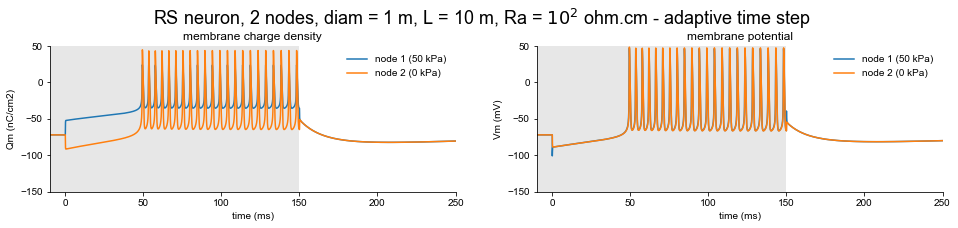

In [8]:
fig = runAStim(neuron, nnodes, diam, L, Ra, connector, a, Fdrive, Adrive, tstim, toffset, PRF, DC)

Let's analyze these profiles phase by phase:

**Phase 1 (stimulus onset):**
- stimulus onset creates an instantaneous capacitance drop and hyperpolarization of the stimulated node (to ca. -140 $mV$), while the non stimulated node is unaffected and stays at -70 $mV$
- voltage imbalance drives significant axial currents that equilibrate the membrane potentials of the 2 nodes almost instantaneously to an intermediate value (ca. -90 $mV$). This equilibration through axial currents drives instantaneous changes in membrane charge density (increase at the stimulated node, decrease at the neighboring node)

**Phase 2 (progressive depolarization):**
- the US stimulus progressively increases $Q_m$ and $V_{m, eff}$ at the stimulated node through leakage membrane current
- axial current spreads to the neighboring node in order to equilibrate both effective membrane potentials, which also increases $Q_m$ at the neighboring node

**Phase 3 (spiking)**:
- $Q_m$ reaches a threshold value at node 1 that drives ion channels opening and triggers a spike train
- the neighboring node also reaches its spiking threshold and opens its own ion channels to enter the spike train
- as both nodes are "voltage-locked" through axial conduction, they experience exactly the same spike train in terms of membrane potential despite depending on different effective electrical systems (capacitance and ion channel rate constants)
- the neighboring node shows larger charge density variations since its effective electrical system is not modulated by US

**Phase 4 (stimulus offset):**
- stimulus offset instantaneously restores effective membrane capacitance of the stimulated node to its resting value
- as both nodes now have the same membrane capaictance and are "voltage-locked" through axial conduction, both $Q_m$ and $V_m$ evolve in synchrony


Note that the initial increase in $Q_m$ at the stimulated node brings the membrane much closer to its spiking threshold, which is then reached more quickly. As a result, response latency is diminished compared to a single node configuration.

## Effect of different parameters

Let's now test the effect of changes in model and stimulation parameters on the resulting behavior of the model.

### Cytoplasmic resistivity

 22/08/2018 01:43:36: Creating model: NBLS_RS_2nodes (diam = 1 um, L = 10 um, Ra = 1e+01 ohm.cm) - custom connect scheme
 22/08/2018 01:43:36: Simulation completed in 243.20 ms
 22/08/2018 01:43:36: Creating model: NBLS_RS_2nodes (diam = 1 um, L = 10 um, Ra = 2e+04 ohm.cm) - custom connect scheme
 22/08/2018 01:43:36: Simulation completed in 228.61 ms
 22/08/2018 01:43:36: Creating model: NBLS_RS_2nodes (diam = 1 um, L = 10 um, Ra = 5e+07 ohm.cm) - custom connect scheme
 22/08/2018 01:43:36: Simulation completed in 70.68 ms
 22/08/2018 01:43:36: Creating model: NBLS_RS_2nodes (diam = 1 um, L = 10 um, Ra = 1e+11 ohm.cm) - custom connect scheme
 22/08/2018 01:43:36: Simulation completed in 60.66 ms


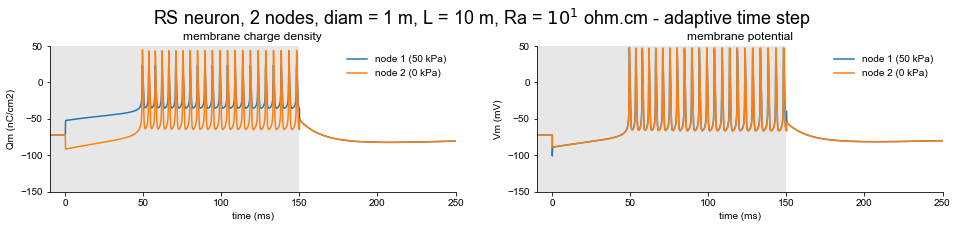

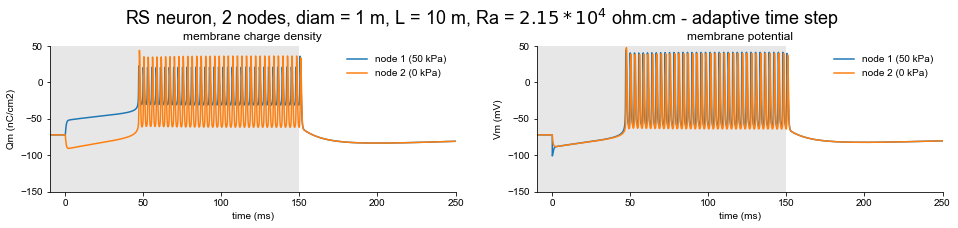

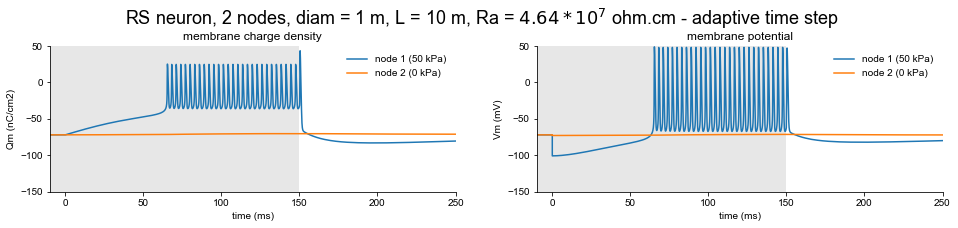

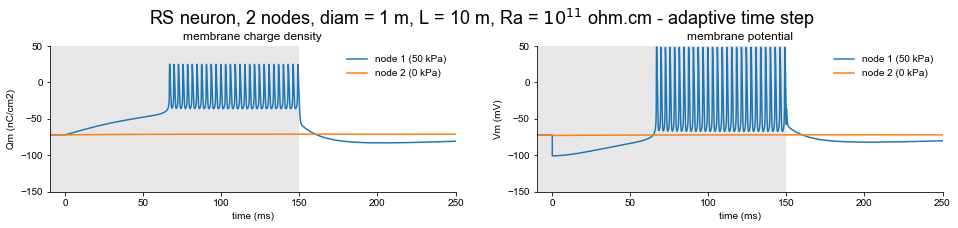

In [9]:
for Ra_range in np.logspace(1, 11, 4):
    fig = runAStim(neuron, nnodes, diam, L, Ra_range, connector, a, Fdrive, Adrive, tstim, toffset, PRF, DC)

As we can see, the default, "voltage-locked" locked behavior of both nodes is hardly affected by cytoplasmic resistivity, since we need to increase it up to completely unrealistic values ($R_a > 10^{10}\ \Omega \cdot cm^2$) in order to restrict axial conduction down to an extent that effectively decouples membrane potentials at both nodes and stop action potential propagation.

### Node diameter

 22/08/2018 01:43:38: Creating model: NBLS_RS_2nodes (diam = 1 fm, L = 10 um, Ra = 1e+02 ohm.cm) - custom connect scheme
 22/08/2018 01:43:38: Simulation completed in 65.17 ms
 22/08/2018 01:43:38: Creating model: NBLS_RS_2nodes (diam = 10 pm, L = 10 um, Ra = 1e+02 ohm.cm) - custom connect scheme
 22/08/2018 01:43:38: Simulation completed in 73.19 ms
 22/08/2018 01:43:38: Creating model: NBLS_RS_2nodes (diam = 100 nm, L = 10 um, Ra = 1e+02 ohm.cm) - custom connect scheme
 22/08/2018 01:43:38: Simulation completed in 248.70 ms
 22/08/2018 01:43:38: Creating model: NBLS_RS_2nodes (diam = 1 mm, L = 10 um, Ra = 1e+02 ohm.cm) - custom connect scheme
 22/08/2018 01:43:39: Simulation completed in 271.22 ms


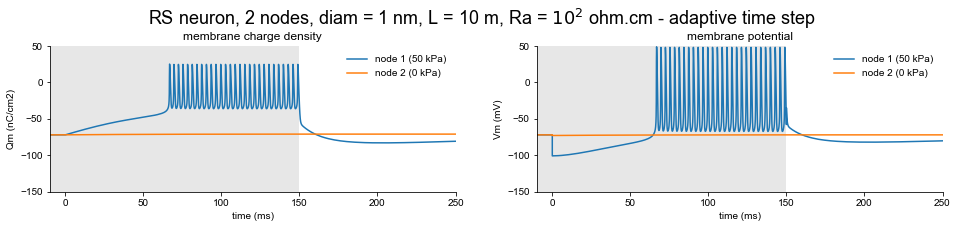

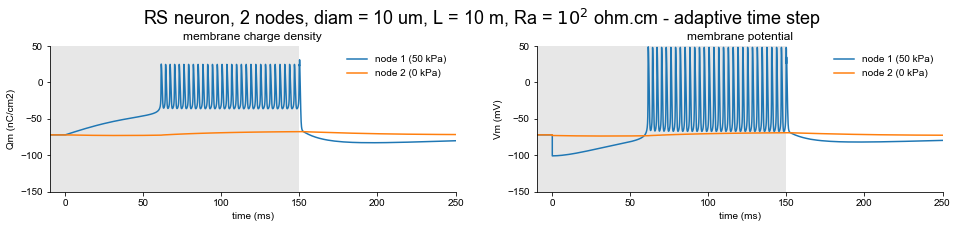

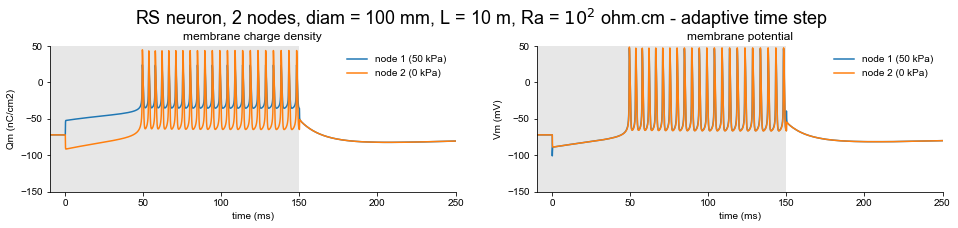

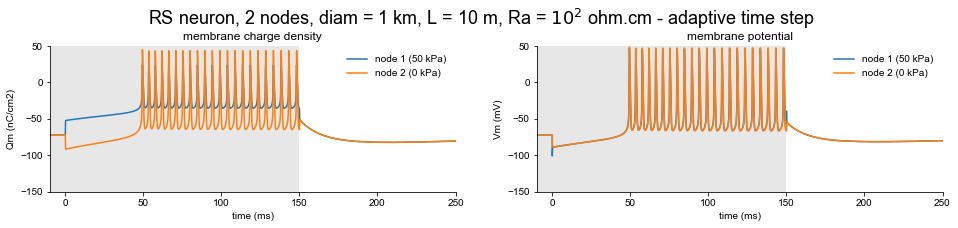

In [10]:
for diam_range in np.logspace(-15, -3, 4):
    fig = runAStim(neuron, nnodes, diam_range, L, Ra, connector, a, Fdrive, Adrive, tstim, toffset, PRF, DC)

Again, the default, "voltage-locked" locked behavior of both nodes is hardly affected by the node diameter, since we need to decrease it down to completely unrealistic values ($D < 1 pm$) in order to decouple membrane potentials at both nodes and stop action potential propagation.

### Number of nodes

 22/08/2018 01:43:40: Creating model: NBLS_RS_1node (diam = 1 um, L = 10 um, Ra = 1e+02 ohm.cm) - custom connect scheme
 22/08/2018 01:43:40: Simulation completed in 23.56 ms
 22/08/2018 01:43:40: Creating model: NBLS_RS_2nodes (diam = 1 um, L = 10 um, Ra = 1e+02 ohm.cm) - custom connect scheme
 22/08/2018 01:43:40: Simulation completed in 150.40 ms
 22/08/2018 01:43:40: Creating model: NBLS_RS_3nodes (diam = 1 um, L = 10 um, Ra = 1e+02 ohm.cm) - custom connect scheme
 22/08/2018 01:43:40: Simulation completed in 248.66 ms
 22/08/2018 01:43:40: Creating model: NBLS_RS_4nodes (diam = 1 um, L = 10 um, Ra = 1e+02 ohm.cm) - custom connect scheme
 22/08/2018 01:43:41: Simulation completed in 269.39 ms
 22/08/2018 01:43:41: Creating model: NBLS_RS_5nodes (diam = 1 um, L = 10 um, Ra = 1e+02 ohm.cm) - custom connect scheme
 22/08/2018 01:43:41: Simulation completed in 285.93 ms


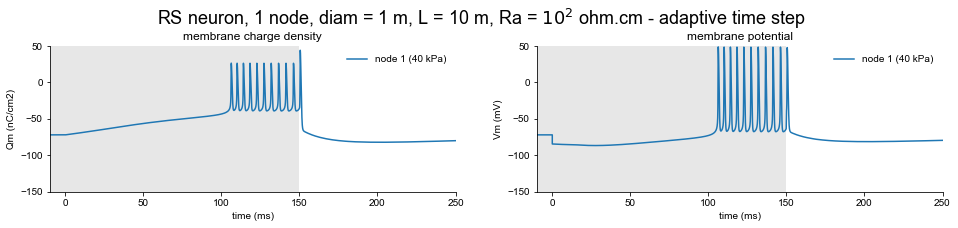

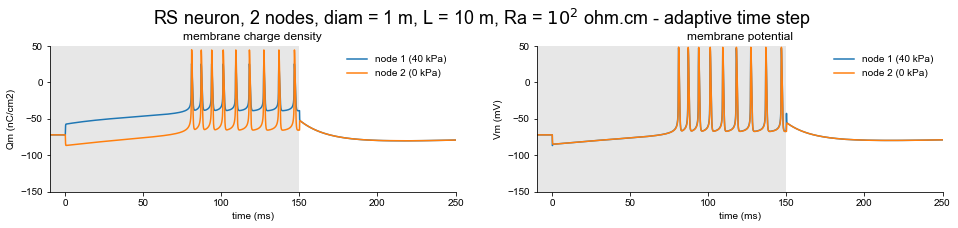

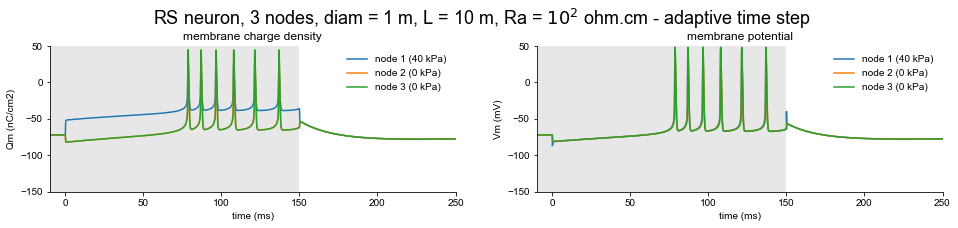

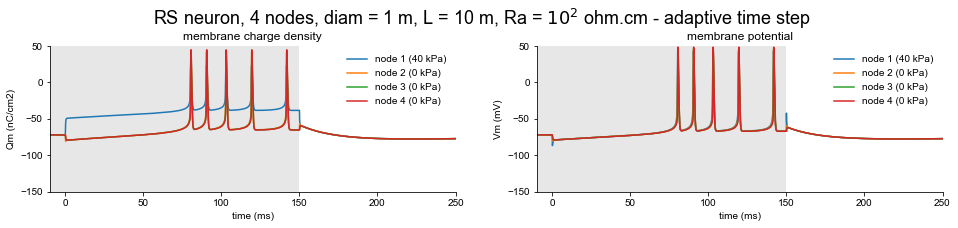

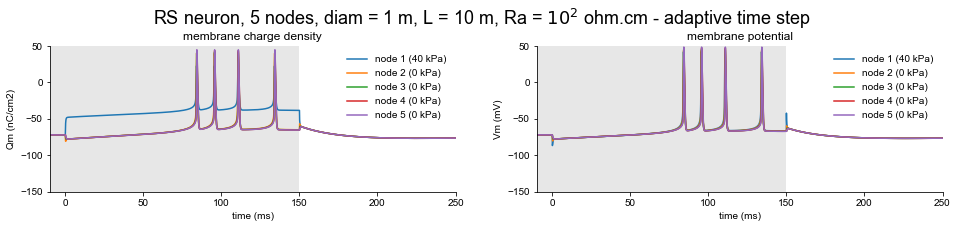

In [11]:
for nnodes_range in range(1, 5 + 1):
    fig = runAStim(neuron, nnodes_range, diam, L, Ra, connector, a, Fdrive, 40e3, tstim, toffset, PRF, DC)

Interestingly, the connection of the stimulated node with a neighboring does not only decreases response latency (for reasons explained above), but it also decreases the firing rate, as axial conduction effectively slows down the charge increase at the stimulated node.

Further increasing the number of nodes creates a higher axial driving force at the stimulated node: axial currents spread more intensely towards neighboring nodes, thereby limiting the depolarization of the stimulated node. As a result, and firing rate further decreases. However, every action potential spreads all the way to the last node. 

### Stimulus amplitude

 22/08/2018 01:43:42: Creating model: NBLS_RS_2nodes (diam = 1 um, L = 10 um, Ra = 1e+02 ohm.cm) - custom connect scheme
 22/08/2018 01:43:43: Simulation completed in 139.91 ms
 22/08/2018 01:43:43: Creating model: NBLS_RS_2nodes (diam = 1 um, L = 10 um, Ra = 1e+02 ohm.cm) - custom connect scheme
 22/08/2018 01:43:43: Simulation completed in 533.92 ms
 22/08/2018 01:43:43: Creating model: NBLS_RS_2nodes (diam = 1 um, L = 10 um, Ra = 1e+02 ohm.cm) - custom connect scheme
 22/08/2018 01:43:44: Simulation completed in 561.99 ms


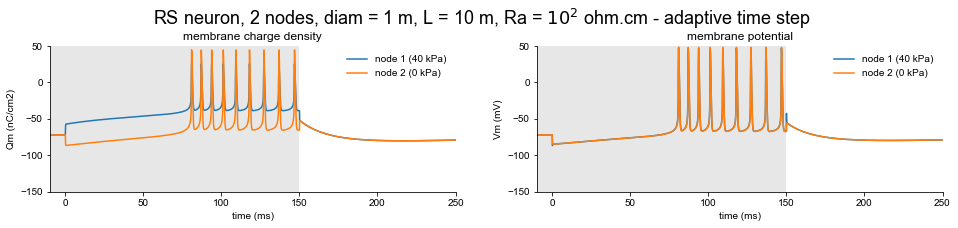

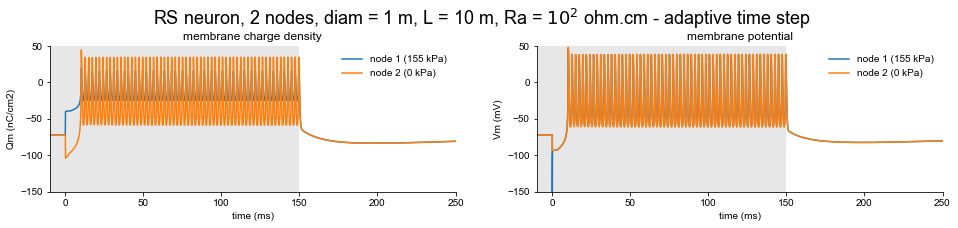

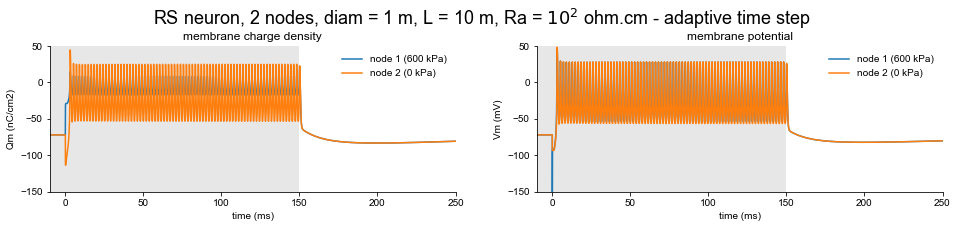

In [12]:
for Adrive_range in np.logspace(np.log10(40e3), np.log10(600e3), 3):
    fig = runAStim(neuron, nnodes, diam, L, Ra, connector, a, Fdrive, Adrive_range, tstim, toffset, PRF, DC)

Expectedly, increasing the amplitude of the acousic stimulus increases the neuron firing rate, and reduces the membrane charge density variation range at the stimulated node, but not at the neighboring node. 

### Stimulus duty cycle

 22/08/2018 01:43:45: Creating model: NBLS_RS_2nodes (diam = 1 um, L = 10 um, Ra = 1e+02 ohm.cm) - custom connect scheme
 22/08/2018 01:43:45: Simulation completed in 254.21 ms
 22/08/2018 01:43:45: Creating model: NBLS_RS_2nodes (diam = 1 um, L = 10 um, Ra = 1e+02 ohm.cm) - custom connect scheme
 22/08/2018 01:43:45: Simulation completed in 278.29 ms
 22/08/2018 01:43:46: Creating model: NBLS_RS_2nodes (diam = 1 um, L = 10 um, Ra = 1e+02 ohm.cm) - custom connect scheme
 22/08/2018 01:43:46: Simulation completed in 311.83 ms
 22/08/2018 01:43:46: Creating model: NBLS_RS_2nodes (diam = 1 um, L = 10 um, Ra = 1e+02 ohm.cm) - custom connect scheme
 22/08/2018 01:43:46: Simulation completed in 237.29 ms


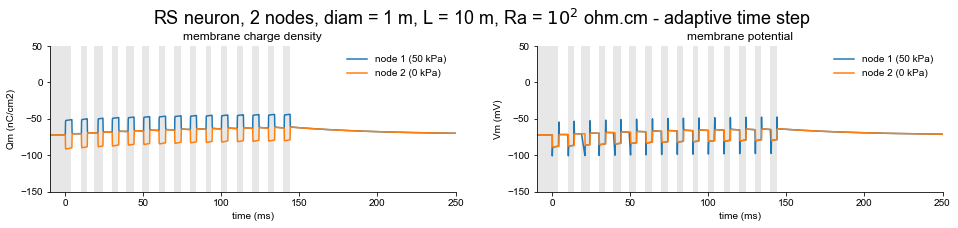

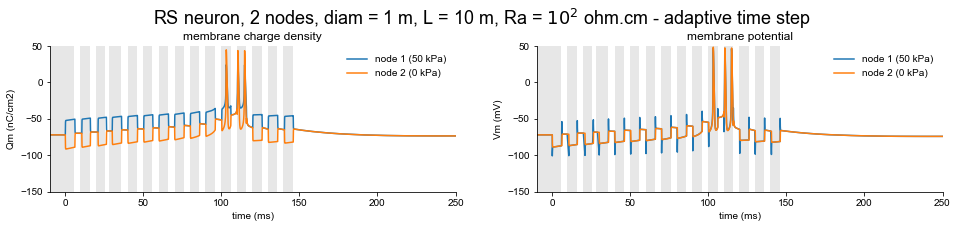

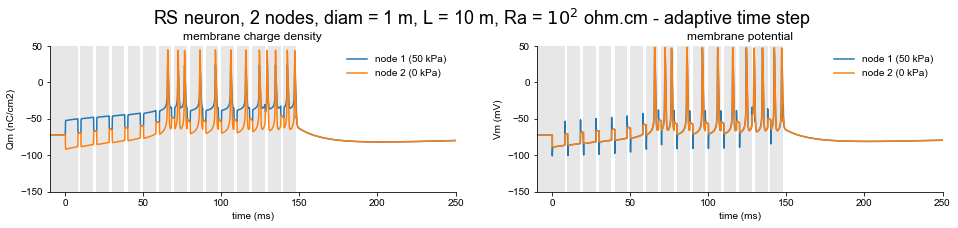

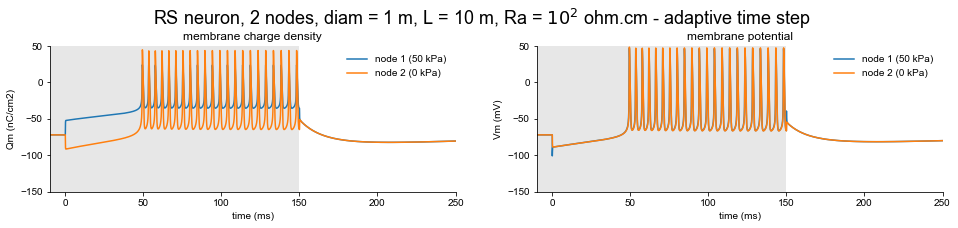

In [13]:
for DC_range in np.linspace(0.4, 1, 4):
    fig = runAStim(neuron, nnodes, diam, L, Ra, connector, a, Fdrive, Adrive, tstim, toffset, PRF, DC_range)

Expectedly, under pulsed stimuli, the system behaves during each pulse onset exactly as it behaves during an entire CW stimulus: 
- pulse onset triggers instantaneous capacitance drop and hyperpolarization at stimulated node
- membrane potentials equilibration through axial currents create opposite charge variations at the stimulated (> 0) and neighboring (< 0) nodes
- during US-OFF periods, membrane charge densities at both nodes evolve according to their respective electrical systems but are also slightly influenced by axial conduction that keeps both nodes "voltage-locked"
- stimulus offset restores resting membrane capacitance at stimulated node, at which point both nodes evolve in synchrony during the US-OFF periods


### Excitation threshold

 22/08/2018 01:43:47: Creating model: NBLS_RS_1node (diam = 1 um, L = 10 um, Ra = 1e+02 ohm.cm) - custom connect scheme
 22/08/2018 01:43:47: Simulation completed in 4.01 ms
 22/08/2018 01:43:47: Creating model: NBLS_RS_2nodes (diam = 1 um, L = 10 um, Ra = 1e+02 ohm.cm) - custom connect scheme
 22/08/2018 01:43:48: Simulation completed in 84.26 ms
 22/08/2018 01:43:48: Creating model: NBLS_RS_6nodes (diam = 1 um, L = 10 um, Ra = 1e+02 ohm.cm) - custom connect scheme
 22/08/2018 01:43:48: Simulation completed in 276.23 ms


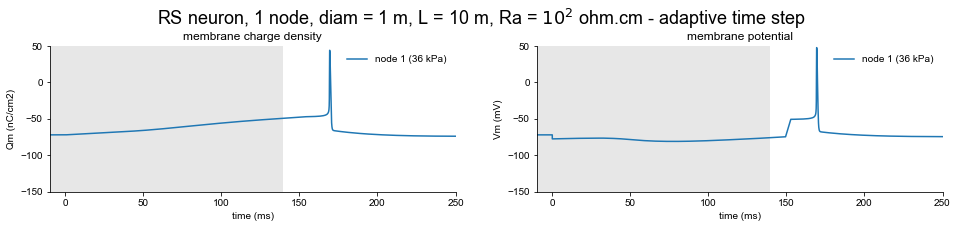

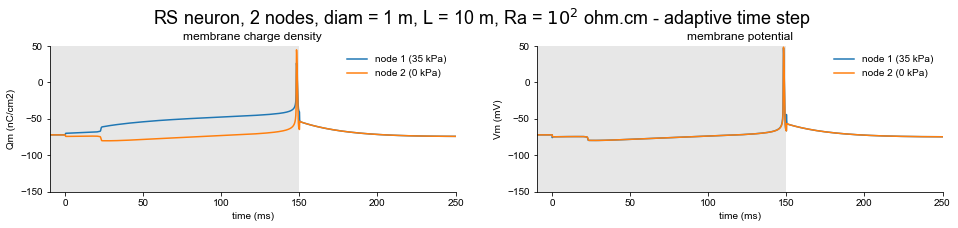

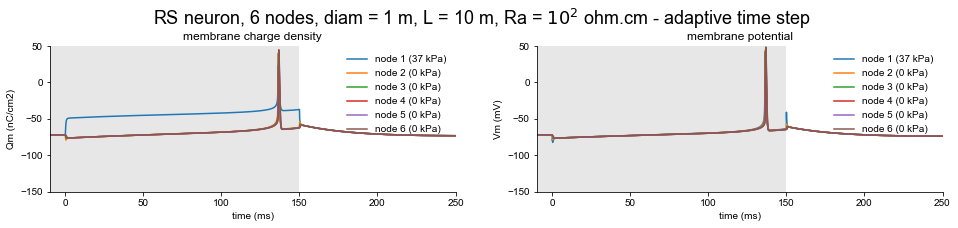

In [14]:
fig = runAStim(neuron, 1, diam, L, Ra, connector, a, Fdrive, 36e3, tstim, toffset, PRF, DC)
fig = runAStim(neuron, 2, diam, L, Ra, connector, a, Fdrive, 35e3, tstim, toffset, PRF, DC)
fig = runAStim(neuron, 6, diam, L, Ra, connector, a, Fdrive, 37e3, tstim, toffset, PRF, DC)

Interestingly, connecting the stimulated node to a single neighboring slightly **decreases** the excitation threshold, probably due to the initial rise in membrane charge density at stimulus onset resulting from the membrane potentials equilibration which brings $Q_m$ closer to the spiking threshold.

Remarkably, further increasing the number of nodes slightly **increases** the stimulation threshold above that of the the single-node configuration, probably because it generates a higher outward axial driving force at the stimulated node, thereby limiting its depolarization.

However, the both phenomena seem to only have a very little effect on the neuron excitation threshold.

## Conclusions:
- Custom connection scheme seems to work properly also when dealing with a different reference voltage variable ($V_{m, eff}$)
- Within realistic bounds of biophysical and geometrical parameters, connected sonophore nodes are effectively **"voltage-locked"**
- Axial conduction reduces response latency but also the neuron firing rate. The latter decreases further as we connect more passive nodes in series
- Very little influence on excitation threshold
- Effect of node length has not been tested has this quantity is intrinsically linked to the sonophore diameter, hence varying that parameter would require to generate additional  lookup tables.